In [ ]:
import networkx as nx
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



import os
os.chdir("..") # Change to parent directory
from struc2vec.src import struc2vec
from struc2vec.src.Helpers import *


## Load data

In [3]:
G = {"0":None,"25":None,"50":None, "75":None}

for perc, graph in G.items():
    G[perc] =  nx.read_gexf( f"Graphs/{perc}_directed.gexf")

In [8]:
s2vG_dict = {}
for perc, graph in G.items():
    s2vG_dict[perc] = struc2vec.struc2vec(graph)

In [9]:
for perc, s2vG in s2vG_dict.items():
    s2vG.getMultiLevelGraph(path=f"GML/{perc}")

# Final embedding
For testing see below

In [ ]:
walks = []
for perc, s2vG in s2vG_dict.items():
    n_walk = 500
    if (perc == "25")|(perc=="50"):
        n_walk = 1000
    walks_ = s2vG.getRandomWalks(number_of_walks = n_walk, walk_length=80)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=75)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

# pca = PCA(n_components=4)
# X_transform = pca.fit_transform(X)
# index_embeddings = {}
# for index, embedding in enumerate(X_transform):
#     emb_list = [x for x in embedding]
#     embedding_i = emb_list.index(max(emb_list))
#     index_embeddings[index] = embedding_i

# nodes_00 = [*G["0"].nodes()]
# embedding_00 = [*index_embeddings.values()]
# cmap = {0:"lightblue",1:"lightyellow", 2:"orange",3:"pink"}
# meta_00 = get_meta_data(G["0"], nodes_00,embedding_00,cmap=cmap)
# meta_00

In [11]:
pca = PCA(n_components=10)
pca.fit(X)
eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

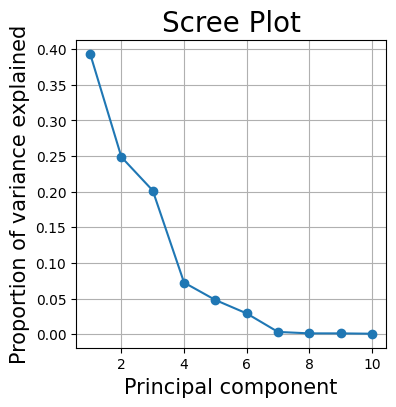

In [12]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1, len(prop_var)+1), 
                   prop_var, marker='o')
plt.xlabel('Principal component',
           size = 15)
plt.ylabel('Proportion of variance explained',
           size = 15)
plt.title('Scree Plot',
          size = 20)
plt.grid(True)

In [15]:
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
cmap = {0:"lightblue",1:"lightyellow", 2:"orange",3:"pink"}
meta_00, meta_group = get_meta_data(G["0"], nodes_00,embedding_00,cmap=cmap)
meta_group

,Number of nodes,Color,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,,
0,70,lightblue,0.518,0.010,0.526,83.143,56.486,1.638
1,73,lightyellow,0.670,0.000,0.387,9.479,15.904,35.198
2,83,orange,0.642,0.001,0.436,21.506,38.337,2.641


In [16]:
pd.DataFrame(zip(nodes_00,embedding_00), columns=["Node", "Embedding"]).to_excel("embeddings/all_nw500_1000_wl80_vs75_pca3.xlsx")

## Initial analysis for comparison

In [25]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
    walks.extend(walks_)

In [26]:
model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

In [27]:
pca = PCA(n_components=10)
pca.fit(X)
eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

In [39]:
# plt.figure(figsize=(4,4))
# plt.plot(np.arange(1, len(prop_var)+1), 
#                    prop_var, marker='o')
# plt.xlabel('Principal component',
#            size = 15)
# plt.ylabel('Proportion of variance explained',
#            size = 15)
# plt.title('Scree Plot',
#           size = 20)
# plt.grid(True)

In [29]:
pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

In [38]:
nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,63,0.455,0.011,0.652,98.063,58.175,1.143
1,89,0.643,0.001,0.458,14.303,20.270,25.245
2,41,0.757,0.000,0.146,5.220,36.561,12.467
3,33,0.653,0.001,0.406,19.152,40.273,2.224


## s2vGXX

In [41]:
walks = s2vG_dict["75"].getRandomWalks(number_of_walks = 500, walk_length=40)
# for perc, s2vG in s2vG_dict.items():
#     walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
#     walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,80,0.591,0.004,0.485,42.050,32.962,14.817
1,50,0.672,0.002,0.387,21.960,34.080,11.100
2,48,0.586,0.006,0.464,44.938,41.292,6.742
3,48,0.615,0.003,0.434,34.958,41.125,17.486


In [42]:
walks = s2vG_dict["50"].getRandomWalks(number_of_walks = 500, walk_length=40)
# for perc, s2vG in s2vG_dict.items():
#     walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
#     walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,92,0.624,0.002,0.432,28.283,30.793,14.589
1,45,0.685,0.003,0.345,18.400,36.267,19.988
2,43,0.583,0.004,0.501,50.721,38.628,4.557
3,46,0.549,0.008,0.529,58.391,47.196,10.125


In [43]:
walks = s2vG_dict["25"].getRandomWalks(number_of_walks = 500, walk_length=40)
# for perc, s2vG in s2vG_dict.items():
#     walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
#     walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,74,0.603,0.003,0.433,35.527,42.324,6.119
1,68,0.647,0.001,0.421,14.706,23.735,14.616
2,44,0.611,0.004,0.451,53.773,45.159,4.033
3,40,0.576,0.009,0.518,57.550,39.100,31.980


In [44]:
walks = s2vG_dict["0"].getRandomWalks(number_of_walks = 500, walk_length=40)
# for perc, s2vG in s2vG_dict.items():
#     walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
#     walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,89,0.624,0.004,0.487,37.101,33.494,21.955
1,42,0.683,0.000,0.306,10.548,27.714,9.676
2,50,0.573,0.007,0.445,52.360,49.240,3.446
3,45,0.571,0.002,0.506,42.978,37.556,8.237


## Hyperparameters of RW

### Number of walks

In [45]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=40)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,85,0.702,0.001,0.313,11.400,35.753,3.907
1,63,0.584,0.001,0.477,23.524,21.698,25.278
2,40,0.527,0.015,0.598,101.625,50.675,23.410
3,38,0.552,0.003,0.545,46.868,49.053,1.115


In [47]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1500, walk_length=40)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,73,0.672,0.001,0.427,14.082,25.178,12.792
1,87,0.621,0.002,0.404,33.598,47.046,2.164
2,46,0.536,0.013,0.537,82.630,39.152,31.647
3,20,0.542,0.002,0.511,27.250,28.250,16.275


### Walk length

In [46]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=60)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,72,0.741,0.000,0.265,9.847,33.819,8.702
1,78,0.545,0.007,0.536,51.269,29.603,27.848
2,66,0.580,0.002,0.519,38.894,44.712,1.287
3,10,0.434,0.007,0.605,102.200,60.200,1.970


In [48]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=80)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,79,0.708,0.000,0.361,8.608,19.418,28.571
1,52,0.629,0.002,0.367,41.885,46.365,2.483
2,76,0.578,0.002,0.504,29.289,38.632,6.690
3,19,0.311,0.028,0.805,169.105,74.526,0.457


In [51]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=100)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=50)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,76,0.624,0.001,0.410,13.645,25.171,16.458
1,85,0.614,0.002,0.423,36.200,46.859,1.883
2,46,0.562,0.012,0.537,82.239,39.696,31.577
3,19,0.684,0.001,0.497,21.053,30.263,2.102


### W2V Vector size

In [49]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=75)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,145,0.686,0.001,0.354,11.090,27.110,17.912
1,34,0.436,0.012,0.687,116.265,57.882,1.337
2,42,0.539,0.003,0.535,44.952,48.167,6.161
3,5,0.315,0.037,0.809,169.600,75.000,0.369


In [50]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 500, walk_length=40)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=100)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,56,0.447,0.013,0.664,103.875,58.964,1.135
1,86,0.666,0.000,0.429,12.419,17.302,30.501
2,53,0.625,0.002,0.457,25.132,40.547,1.831
3,31,0.746,0.000,0.095,2.581,43.806,3.860


### Testing combinations

In [ ]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=80)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=75)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,70,0.471,0.010,0.629,89.214,56.014,1.171
1,78,0.635,0.001,0.456,14.564,19.282,22.750
2,48,0.768,0.000,0.203,6.896,33.979,17.679
3,30,0.639,0.002,0.396,19.500,41.367,6.610


In [53]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=80)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=100)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,60,0.445,0.012,0.652,99.283,57.350,4.698
1,73,0.675,0.001,0.331,16.151,41.808,2.195
2,53,0.732,0.000,0.358,8.057,15.038,39.960
3,40,0.594,0.001,0.475,18.350,25.175,8.585


In [54]:
walks = []
for perc, s2vG in s2vG_dict.items():
    walks_ = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=80)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=110)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00)
meta_00

,Number of nodes,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,
0,76,0.709,0.001,0.316,11.961,36.000,3.458
1,58,0.583,0.001,0.451,15.690,19.672,27.082
2,41,0.540,0.014,0.563,94.390,48.415,24.599
3,51,0.561,0.003,0.548,51.137,47.745,1.200


## For viz

In [68]:
walks = []
for perc, s2vG in s2vG_dict.items():
    n_walk = 500
    if (perc == "25")|(perc=="50"):
        n_walk = 1000
    walks_ = s2vG.getRandomWalks(number_of_walks = n_walk, walk_length=80)
    walks.extend(walks_)

model = Word2Vec(walks, vector_size=75)
embeddings = {node: model.wv[node] for node in G["0"].nodes}
embeddings_values = [x for x in embeddings.values()]
X = np.array(embeddings_values)

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X)
index_embeddings = {}
for index, embedding in enumerate(X_transform):
    emb_list = [x for x in embedding]
    embedding_i = emb_list.index(max(emb_list))
    index_embeddings[index] = embedding_i

nodes_00 = [*G["0"].nodes()]
embedding_00 = [*index_embeddings.values()]
cmap = {0:"lightblue",1:"lightyellow", 2:"orange",3:"pink"}
meta_00 = get_meta_data(G["0"], nodes_00,embedding_00,cmap=cmap)
meta_00

,Number of nodes,Color,Clustering,Betweenness_centrality,Closeness_centrality,InDegree,OutDegree,Average_weight
Embedding,,,,,,,,
0,66,lightblue,0.689,0.001,0.321,15.227,36.561,3.124
1,67,lightyellow,0.585,0.001,0.476,22.657,21.522,24.434
2,50,orange,0.553,0.012,0.525,87.140,49.360,20.233
3,43,pink,0.609,0.002,0.510,32.953,45.907,1.127


In [74]:
pd.DataFrame(zip(nodes_00,embedding_00), columns=["Node", "Embedding"]).to_excel("embeddings/all_nw500_1000_wl80_vs75_pca4.xlsx")

### Visualization

In [69]:
cmap = {0:"lightblue",1:"lightyellow", 2:"orange",3:"pink"}
nodecolors = [cmap[v] for k,v in index_embeddings.items()]
weights = [edge[2]["weight"] for edge in G["0"].edges(data=True)]
weights_scaled = scale_weights(weights)

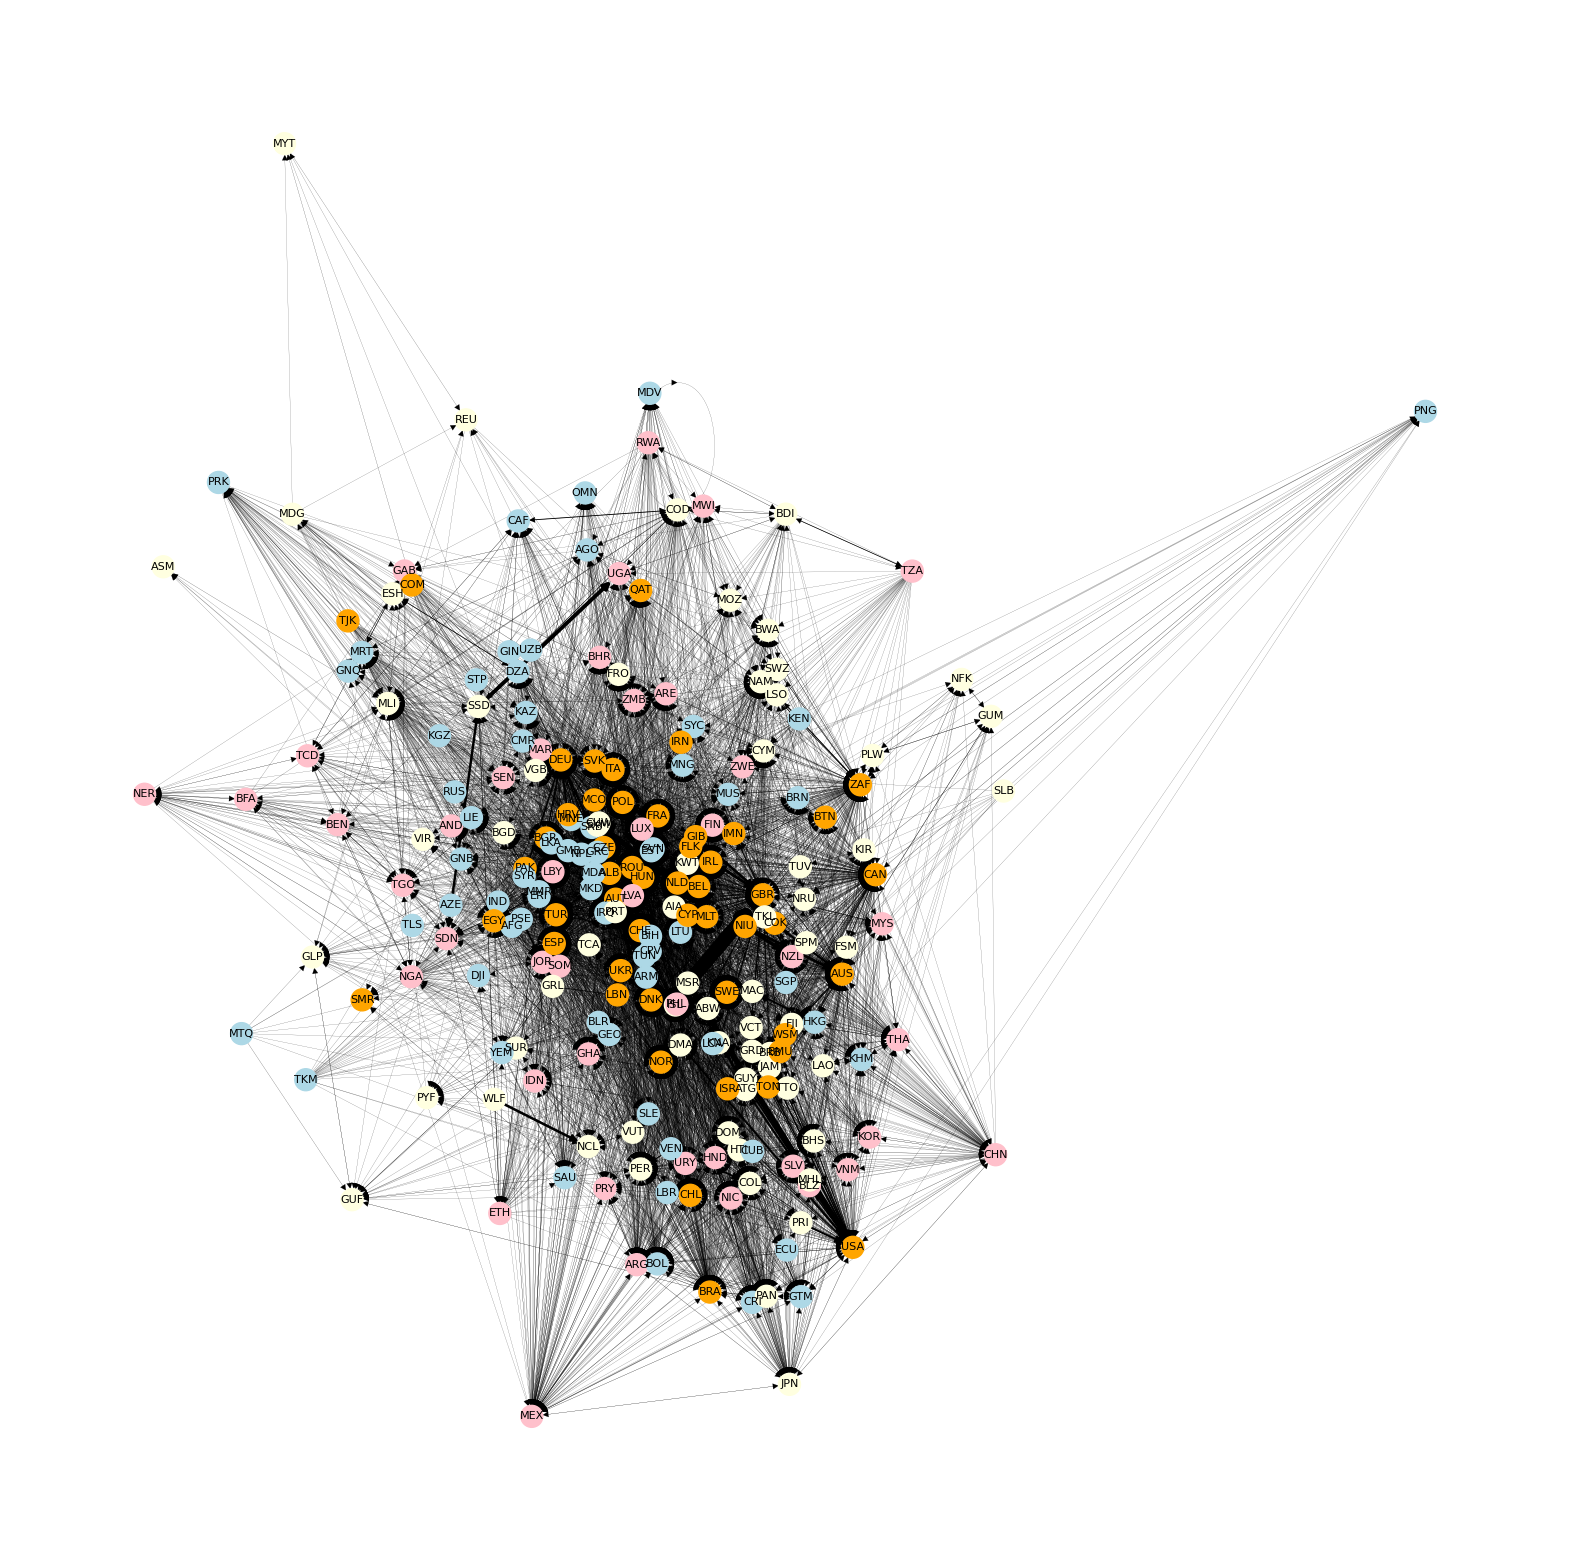

In [70]:
fig, ax = plt.subplots(figsize=(20,20))

nx.draw_spring(G["0"], with_labels=True, node_color=nodecolors, width = weights_scaled, node_size=250, font_size=8)